# Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

Firstly, we need import the necessary libraries

In [163]:
#If any of the import doesn't work, run the commented line next to it on terminal
import pandas as pd                 # pip install pandas
import re                           # built-in, no installation needed
from collections import Counter     # built-in, no installation needed
import matplotlib.pyplot as plt     # pip install matplotlib
from datetime import datetime       # built-in, no installation needed
import numpy as np                  # pip install numpy
import seaborn as sns               # pip install seaborn
import duckdb                       # pip install duckdb
from scipy.stats import ttest_ind   # pip install scipy

Next, we will load the dataset and take a look at its structure

In [164]:
#Replace the file name with the file path if it doesn't work
transaction = pd.read_excel('QVI_transaction_data.xlsx', engine='openpyxl')
customer = pd.read_csv('QVI_purchase_behaviour.csv')

## EDA - Exploratory Data Analysis

### Examining transaction data

Firstly, we will take a look at the transactions dataset to understand its structure and contents. This will help us identify how to process the data for our analysis.

In [165]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Next, we inspect the data types of each column in the transactions dataset.

In [166]:
transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Upon inspection, we notice that the DATE column is stored as an int64. This often occurs when reading date-formatted cells from Excel files—Excel represents dates as the number of days since December 30, 1899.

To accurately interpret the transaction dates, we will convert this numeric format into proper datetime objects.

In [167]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin='30-12-1899', unit='D')

This conversion ensures that the DATE column can be used effectively in any time-based analysis, such as filtering by date ranges or aggregating by month.

Next, we will check if there are any missing values in the dataset. This is crucial for ensuring the integrity of our analysis, as missing data can lead to inaccurate results.

In [168]:
trans_missing = transaction.isnull().sum().sum() 
if trans_missing == 0:
    print("No missing values in transaction data.")
else:
    print(f"Missing values in transaction: {trans_missing}")

No missing values in transaction data.


No missing values were found in the dataset, which is great for our analysis. This means we can proceed without worrying about handling missing data.

Now we will start analyzing the product names. Since our goal is to analyze the Chips selling data, we need to get only the chips products from the dataset.

#### Examine PROD_NAME

In [169]:
products = list(transaction['PROD_NAME'].unique())
products.sort()
print(f'Total number of products: {len(products)}')
print('')
for prod in products:
    print(prod)
#click on 'open in a text editor' to see the full list of products

Total number of products: 114

Burger Rings 220g
CCs Nacho Cheese    175g
CCs Original 175g
CCs Tasty Cheese    175g
Cheetos Chs & Bacon Balls 190g
Cheetos Puffs 165g
Cheezels Cheese 330g
Cheezels Cheese Box 125g
Cobs Popd Sea Salt  Chips 110g
Cobs Popd Sour Crm  &Chives Chips 110g
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
Dorito Corn Chp     Supreme 380g
Doritos Cheese      Supreme 330g
Doritos Corn Chip Mexican Jalapeno 150g
Doritos Corn Chip Southern Chicken 150g
Doritos Corn Chips  Cheese Supreme 170g
Doritos Corn Chips  Nacho Cheese 170g
Doritos Corn Chips  Original 170g
Doritos Mexicana    170g
Doritos Salsa       Medium 300g
Doritos Salsa Mild  300g
French Fries Potato Chips 175g
Grain Waves         Sweet Chilli 210g
Grain Waves Sour    Cream&Chives 210G
GrnWves Plus Btroot & Chilli Jam 180g
Infuzions BBQ Rib   Prawn Crackers 110g
Infuzions Mango     Chutny Papadums 70g
Infuzions SourCream&Herbs Veg Strws 110g
Infuzions Thai SweetChili PotatoMix 110g
Infzns Crn Crnchers Tangy Gca

We can see that there are some salsa products, which are not chips.  

We will remove these products from our analysis.


In [170]:
#Filter out products that contain 'salsa'
transaction = transaction[~transaction['PROD_NAME'].str.contains('salsa', case=False, na=False)]
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


The dataset now contains only the chips products, which is what we need for our analysis. 

- The filtered dataset has 246742 rows compared to 264836 rows in the original dataset.

- This means we have removed 18194 rows (about 6.83%) that are not chips products.

### Examine PROD_QTY

Next, we will analyze the summary statistics number of chip packets purchased per transaction by examining the distribution of the PROD_QTY column.

In [171]:
transaction['PROD_QTY'].describe()

count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

Interpretation:

-The mean number of chips bought per transaction is approximately 1.91.

-The median (50%) is 2, which means most customers tend to buy 1 or 2 items.

-The distribution is highly right-skewed, as shown by the maximum value of 200, likely an outlier or bulk purchase.

We may need to further investigate these unusually large purchases in the next step to ensure data quality.

We will check every transaction with a quantity greater than 10 to see if they are valid or outliers.

In [172]:
#Check for unusual skew in product quantities
skew = transaction[transaction['PROD_QTY']>10]
skew

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer with the loyalty card number 226000. 

We will check if that customer has had other transactions

In [173]:
#check if this user buy made any other transactions
skew_buyer = transaction[transaction['LYLTY_CARD_NBR'] == 226000]
skew_buyer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


This reveals that the customer only made those two transactions, both involving extremely high quantities.

This suggests that the customer is not a typical retail shopper. Instead, they may have been purchasing chips for commercial or bulk-use purposes (e.g., reselling, catering, etc.).

To ensure that our analysis reflects standard consumer behavior, we will exclude this customer from the dataset:

In [174]:
transaction = transaction[transaction['LYLTY_CARD_NBR'] != 226000]

This step helps maintain the integrity of the dataset by removing atypical purchasing patterns that could skew our analysis.

Now we will check the summary statistics of the number of chips packets purchased per transaction again to see how the removal of the outlier customer has affected the data.

In [175]:
transaction['PROD_QTY'].describe()

count    246740.000000
mean          1.906456
std           0.342499
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: PROD_QTY, dtype: float64

There are some notable changes in the summary statistics after removing the outlier customer:

- The standard deviation has dropped significantly to 0.34, indicating less variability after removing the extreme cases.

- The maximum value is now 5 (which is perfectly normal), compared to 200 before—confirming that outliers have been effectively removed.

Now, we will check the date range of the transactions to understand the time period covered by the dataset.

In [176]:
start_day = min(transaction['DATE'])
end_day = max(transaction['DATE'])
print(f"Data is from {start_day} to {end_day}.")
print(f"There should be {(end_day - start_day).days + 1} days of data.")
print(f"There are {transaction['DATE'].nunique()} unique dates in the data.")

Data is from 2018-07-01 00:00:00 to 2019-06-30 00:00:00.
There should be 365 days of data.
There are 364 unique dates in the data.


The dataset covers a full financial year from 1 July 2018 to 30 June 2019.

However, we observe that there is 1 missing date, as only 364 unique dates are present.

This likely indicates a day when no transactions were recorded—possibly due to store closure (e.g., a public holiday like Christmas).

We will proceed to find the missing date in the dataset to understand which day had no transactions.

In [177]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')
for day in date_range:
    if day not in transaction['DATE'].values:
        print(f"Missing data for {day.strftime('%Y-%m-%d')}")

Missing data for 2018-12-25


Since the missing date corresponds to Christmas Day (2018-12-25), it is reasonable to assume that the store was closed, resulting in no recorded transactions.

With that issue addressed, we now proceed to calculate the number of transactions per day throughout the analysis period.

In [178]:
transactions_per_day = transaction.groupby('DATE').size().reset_index(name='TRANSACTION_COUNT')
#optional: Fill the missing date with 0 transactions. But it will make the graph less clear.
'''
missing_row = pd.DataFrame({'DATE': [pd.to_datetime('2018-12-25')], 'TRANSACTION_COUNT': [0]})
transactions_per_day = pd.concat([transactions_per_day, missing_row], ignore_index=True)
transactions_per_day.sort_values('DATE', inplace=True)
'''
transactions_per_day

,DATE,TRANSACTION_COUNT
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


*The result is a DataFrame, which functions like an Excel table. You can fill the missing date if you prefer a complete timeline, but it's not strictly necessary.*

Now, we will create a time series plot to visualize the number of transactions per day.

Since 25 December 2018 had no recorded transactions due to store closure, we choose not to include it with a 0 value in the plot. Adding it would introduce a sudden, artificial drop that could distort the visual flow and make the chart harder to interpret.

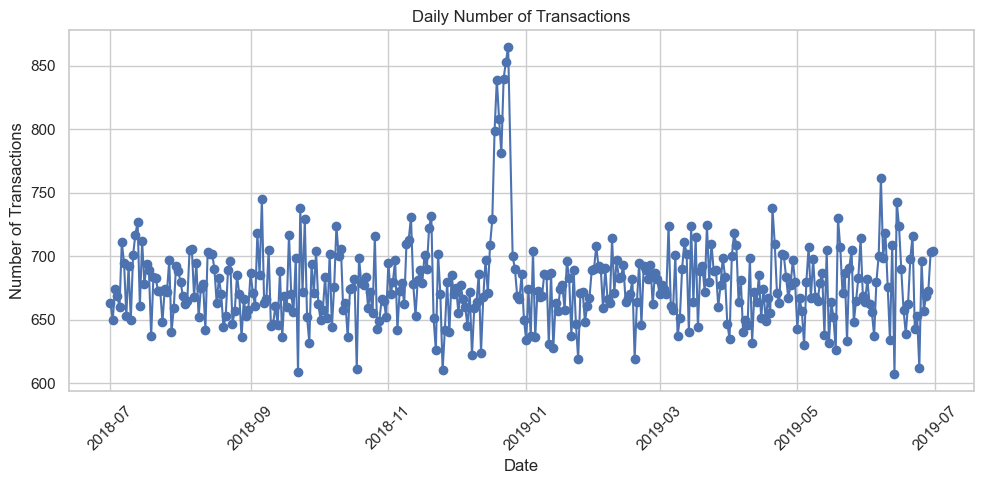

In [179]:
plt.figure(figsize=(10, 5))
plt.plot(transactions_per_day['DATE'], transactions_per_day['TRANSACTION_COUNT'], marker='o')
plt.title('Daily Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

From the time series plot, we observe that:

- The number of daily transactions generally fluctuates between 600 and 750.

- However, there is a notable spike in December, where transaction counts peak above 850.

This surge is short-lived, as the transaction volume returns to normal levels in January.

To better understand this trend, we will zoom in on the November to January period

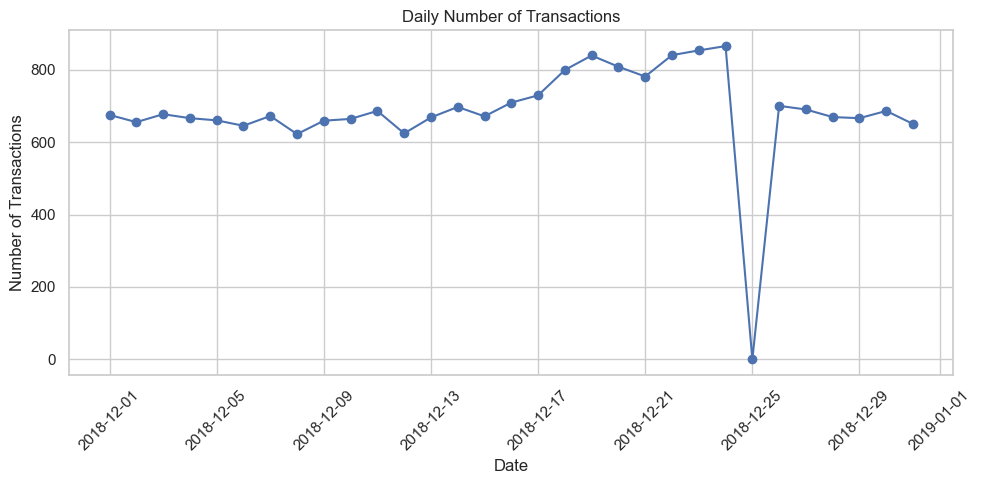

In [180]:
december_transactions = transactions_per_day[transactions_per_day['DATE'].dt.month == 12]
#add the missing date for December 25th, 2018 with 0 transactions
missing_row = pd.DataFrame({'DATE': [pd.to_datetime('2018-12-25')], 'TRANSACTION_COUNT': [0]})
december_transactions = pd.concat([december_transactions, missing_row], ignore_index=True)
december_transactions.sort_values('DATE', inplace=True)
plt.figure(figsize=(10, 5))
plt.plot(december_transactions['DATE'], december_transactions['TRANSACTION_COUNT'], marker='o')
plt.title('Daily Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Key Observations:

- Transaction volume remains relatively stable in the 650–700 range during early December.

- Around December 17 onward, there is a clear upward trend, peaking at over 850 transactions on December 24 (Christmas Eve).

- On December 25, the transaction count drops to 0 as we manually filled in the DataFrame.

- After Christmas, transaction volume returns to normal levels for the remainder of the month

For the next step, we would like to analyze the products. 

Firstly, we will want to check the statistical summaries of the weight of each product

In [181]:
weights = []
for item in products:
    match = re.search(r'(\d+)\s?g', item, re.IGNORECASE)
    if match:
        weights.append(int(match.group(1)))
print(f"Total number of products with weight information: {len(weights)}")
print(f"Max weight: {max(weights)}g")
print(f"Min weight: {min(weights)}g")

Total number of products with weight information: 114
Max weight: 380g
Min weight: 70g


This shows that chip products range from small 70g packs to large 380g family-size bags.

Since we know that the weights are numerical data, we can plot a histogram to see the distribution of those data

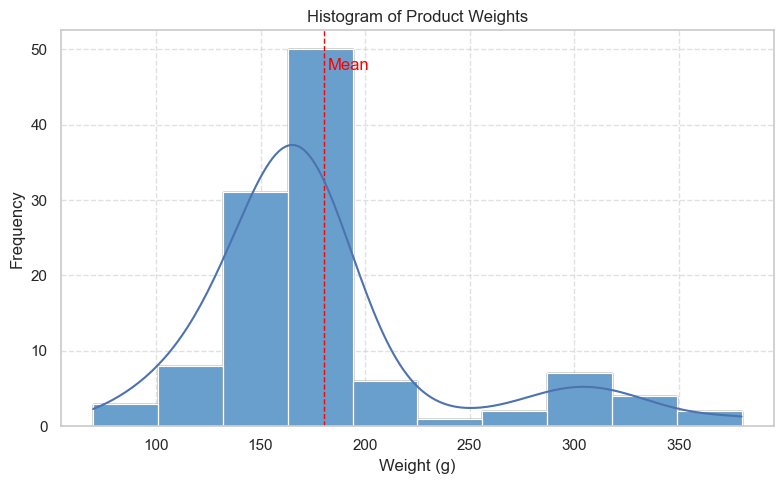

In [182]:
weights = np.array(weights)
plt.figure(figsize=(8, 5))
plt.hist(weights, bins=10, color='skyblue', edgecolor='black')
plt.axvline(weights.mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(weights.mean() + 2, plt.ylim()[1]*0.9, 'Mean', color='red')
sns.histplot(weights, bins=10, kde=True)
plt.title('Histogram of Product Weights')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- The blue curve is a KDE (Kernel Density Estimate), which is a smooth line showing the overall shape of the data.

- The red dashed line represents the average (mean) weight of all products.

What This Histogram Shows:

- Most products are between 150g and 180g (the tall peak).

- Few products are below 100g or above 300g.

- Distribution is right-skewed, meaning a long tail on the heavier side.

Next, we would like to extract the brand names from the products. This is a hard task, and here is an approach to it

In [183]:
#Step 1: Create a list to store the first word of each product
temp_brands = []
for item in products:
    brand = item.split(' ')[0]
    if brand not in temp_brands:
        temp_brands.append(brand)
#Step 2: Get a function to get the brand from each product starting with a starting word in the previous list
#We use the approach of getting the longest matching pattern in each of those words
def get_brand(product_name:str):
    #Create a list to store the words starting with the product_name
    temp = []
    for item in products:
        brand = item.split(' ')[0]
        if brand == product_name:
            temp.append(item.strip().split(" "))
    #Get the longest similar pattern in each word
    ind = 0
    while True:
        try:
            words_at_index = {x[ind].strip() for x in temp}
            if len(words_at_index) > 1 or '' in words_at_index:
                break
            ind += 1
        except IndexError:
            break
    brand = temp[0][:ind]
    return ' '.join(brand)
#Step 3: Use that function to get the brand of each first word in the list
brands = [get_brand(item).strip() for item in temp_brands]
brands
    

['Burger Rings 220g',
 'CCs',
 'Cheetos',
 'Cheezels Cheese',
 'Cobs Popd',
 'Dorito Corn Chp',
 'Doritos',
 'French Fries Potato Chips 175g',
 'Grain Waves',
 'GrnWves Plus Btroot & Chilli Jam 180g',
 'Infuzions',
 'Infzns Crn Crnchers Tangy Gcamole 110g',
 'Kettle',
 'NCC Sour Cream &',
 'Natural',
 'Old El Paso Salsa',
 'Pringles',
 'RRD',
 'Red Rock Deli',
 'Smith Crinkle Cut',
 'Smiths',
 'Snbts Whlgrn Crisps Cheddr&Mstrd 90g',
 'Sunbites Whlegrn',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells Crisps',
 'WW',
 'Woolworths']

While this method works in many common cases, it has several limitations:

- Works well when there are multiple products sharing a consistent prefix.

- Fails when:

    - All products in a brand include a non-brand word (e.g., flavor or size).

    - The brand name is not at the beginning of the product string or not in the string at all

    - There are typos or inconsistencies in the product names.

Because no automated method is perfect due to messy real-world data, we recommend manually reviewing and cleaning the extracted brand names.

 This hybrid approach ensures more accurate grouping and downstream analysis.

In [184]:
brands.remove('Burger Rings 220g')
brands.append('Burger Rings')

brands.remove('Cheezels Cheese')
brands.append('Cheezels')

brands.remove('Cobs Popd')
brands.append('Cobs')

brands.remove('Dorito Corn Chp')

brands.remove('French Fries Potato Chips 175g')
brands.append('French Fries')

brands.remove('GrnWves Plus Btroot & Chilli Jam 180g')

brands.remove('Infzns Crn Crnchers Tangy Gcamole 110g')

brands.remove('Natural')
brands.remove('NCC Sour Cream &')
brands.append('Natural Chip Co.')

brands.remove('Old El Paso Salsa')
brands.append('Old El Paso')

brands.remove('RRD') #It and Red Rock Deli is the same, so we can remove either of these

brands.remove('Smith Crinkle Cut')

brands.remove('Snbts Whlgrn Crisps Cheddr&Mstrd 90g')
brands.remove('Sunbites Whlegrn')
brands.append('Sunbites')

brands.remove('Tyrrells Crisps')
brands.append('Tyrrells')

brands.remove('WW') #Similarly for WW and Woolworths
brands = sorted(brands)
brands

['Burger Rings',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Doritos',
 'French Fries',
 'Grain Waves',
 'Infuzions',
 'Kettle',
 'Natural Chip Co.',
 'Old El Paso',
 'Pringles',
 'Red Rock Deli',
 'Smiths',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'Woolworths']

In [185]:
customer

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [186]:
duplicate_ids = customer[customer.duplicated('LYLTY_CARD_NBR')]
duplicate_ids

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


There are no duplicated ids in the customer table.

Now we will move on to visualize the distribution of lifestage and premium status of customers

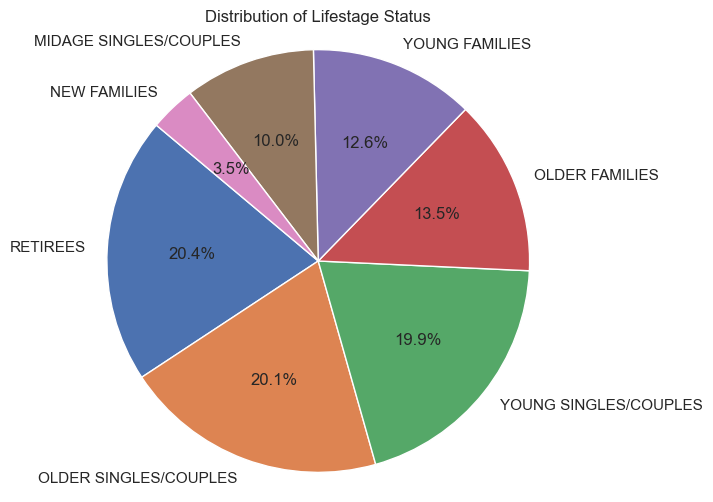

In [187]:
lifestage_count = customer['LIFESTAGE'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(lifestage_count, labels=lifestage_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Lifestage Status')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()

The top three segments are:

- Retirees (20.4%)

- Older Singles/Couples (20.1%)

- Young Singles/Couples (19.9%)

The data reveals a strong representation of mature life stages, with retirees and older adults forming over 40% of the customer base.  

This could suggest greater purchasing power or brand loyalty in these demographics.  

The relatively smaller share of new families may reflect either a lower presence in the customer base or different consumption habits.  

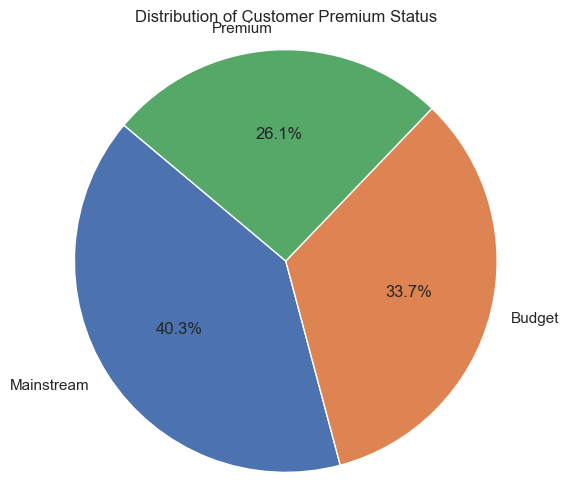

In [188]:
premium_count = customer['PREMIUM_CUSTOMER'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(premium_count, labels=premium_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Premium Status')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()

Key observations:

- Mainstream customers make up the largest segment at 40.3%, suggesting that a significant portion of the customer base seeks balanced or mid-tier products.

- Budget customers account for 33.7%, showing that a sizable group is price-sensitive and likely prefers lower-cost options.

- Premium customers comprise 26.1%, indicating a smaller but still considerable segment interested in high-end or more exclusive offerings.

- The dominance of mainstream and budget segments (a combined 74%) highlights that most customers are either value-conscious or seek standard products

We notice that both the tables share the LYLTY_CARD_NBR column. So we should try to combine the 2 tables into a single big table

In [189]:
#We can either join manually looping through each row, or use some SQL-like JOIN function
combined_data = duckdb.query("""
    SELECT t.DATE, t.STORE_NBR,  t.LYLTY_CARD_NBR, c.LIFESTAGE, c.PREMIUM_CUSTOMER, t.TXN_ID, t.PROD_NBR, t.PROD_NAME, t.PROD_QTY, t.TOT_SALES
    FROM transaction t
    LEFT JOIN customer c
    ON t.LYLTY_CARD_NBR = c.LYLTY_CARD_NBR
""").to_df()
combined_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-09-18,69,69077,YOUNG FAMILIES,Premium,66316,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8
1,2018-11-02,69,69077,YOUNG FAMILIES,Premium,66317,44,Thins Chips Light& Tangy 175g,2,6.6
2,2018-12-17,69,69077,YOUNG FAMILIES,Premium,66318,67,RRD Chilli& Coconut 150g,2,5.4
3,2018-12-22,69,69077,YOUNG FAMILIES,Premium,66319,43,Smith Crinkle Cut Bolognese 150g,2,5.2
4,2019-02-01,69,69077,YOUNG FAMILIES,Premium,66321,74,Tostitos Splash Of Lime 175g,2,8.8
...,...,...,...,...,...,...,...,...,...,...
246735,2019-01-16,69,69069,YOUNG FAMILIES,Premium,66267,36,Kettle Chilli 175g,2,10.8
246736,2019-04-24,69,69069,YOUNG FAMILIES,Premium,66268,103,RRD Steak & Chimuchurri 150g,2,5.4
246737,2019-06-05,69,69069,YOUNG FAMILIES,Premium,66269,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4
246738,2018-07-09,69,69077,YOUNG FAMILIES,Premium,66314,54,CCs Original 175g,2,4.2


Let's check if there are any missing values in the table, as we are using a LEFT JOIN query rather than INNER JOIN

In [190]:
combined_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

So no missing values. Before we continue, let's check if there is any ids in the customer table that aren't in the transaction table

In [191]:
arr = list(transaction['LYLTY_CARD_NBR'].unique())
not_recorded_customers = customer[~customer['LYLTY_CARD_NBR'].isin(arr)]
not_recorded_customers

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
21,1028,YOUNG SINGLES/COUPLES,Budget
78,1117,OLDER SINGLES/COUPLES,Mainstream
90,1137,MIDAGE SINGLES/COUPLES,Premium
95,1143,OLDER FAMILIES,Budget
100,1152,RETIREES,Budget
...,...,...,...
72437,272164,YOUNG FAMILIES,Mainstream
72515,272276,YOUNG FAMILIES,Budget
72530,272295,RETIREES,Mainstream
72547,272321,OLDER SINGLES/COUPLES,Premium


Great, there are no data there! So all our customers in the transaction data has been accounted for in the customer dataset.

Data exploration is now complete!

## Data analysis on customer segments 

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales.

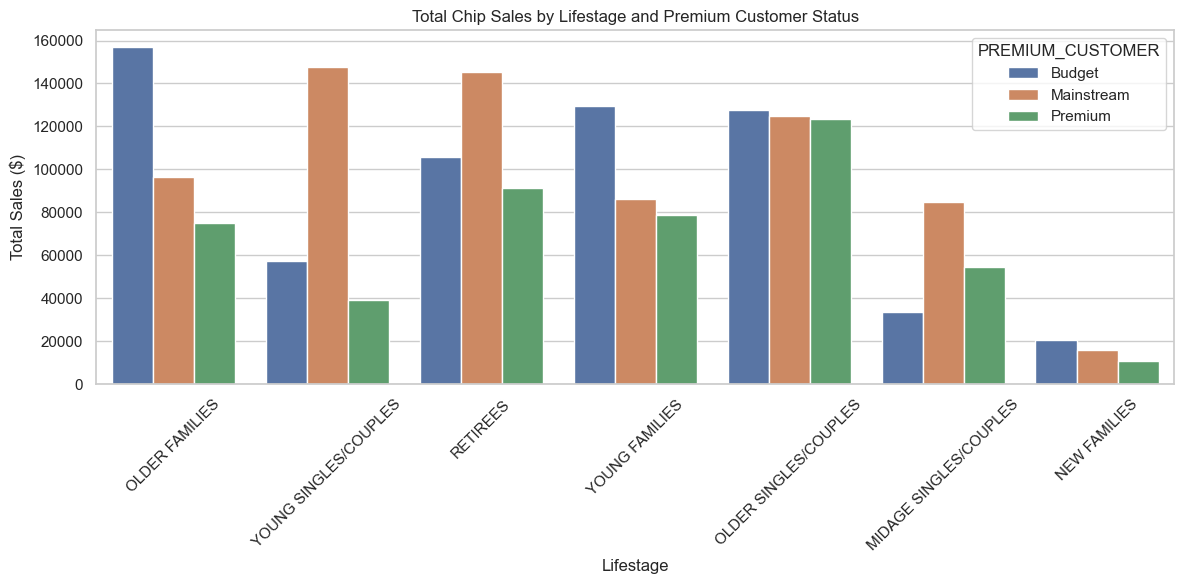

In [193]:
sales_by_segment_sum = combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(
    data=sales_by_segment_sum,
    x='LIFESTAGE',
    y='TOT_SALES',
    hue='PREMIUM_CUSTOMER'
)
plt.title('Total Chip Sales by Lifestage and Premium Customer Status')
plt.ylabel('Total Sales ($)')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

Let's see if the higher sales are due to there being more customers who buy chips.

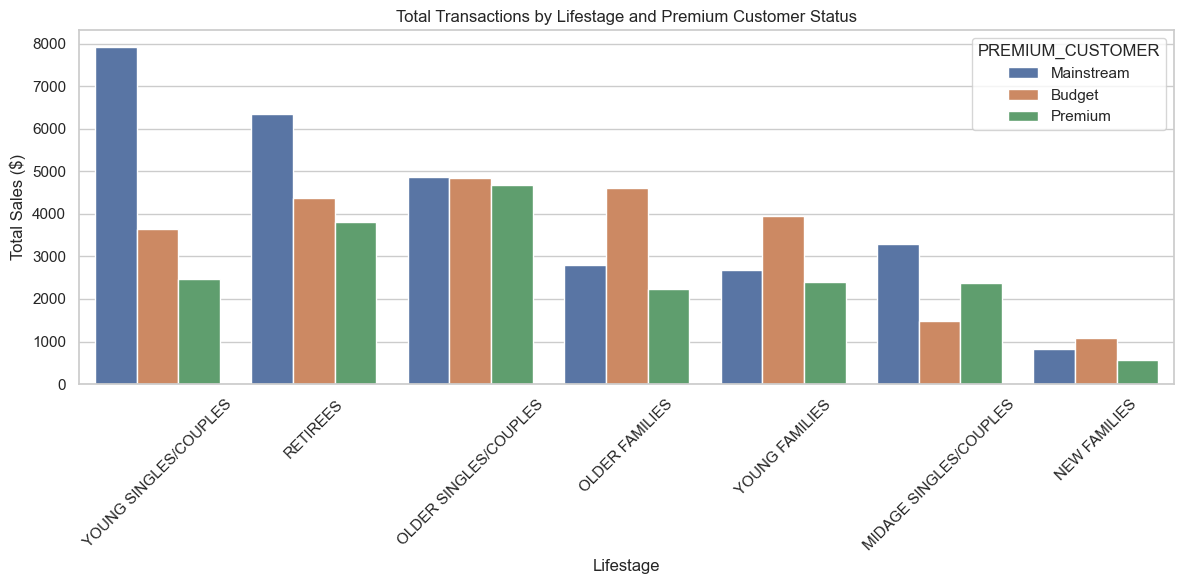

In [194]:
sales_by_segment_count = combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index(name='CUSTOMER_COUNT').sort_values(by='CUSTOMER_COUNT', ascending=False)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(
    data=sales_by_segment_count,
    x='LIFESTAGE',
    y='CUSTOMER_COUNT',
    hue='PREMIUM_CUSTOMER'
)
plt.title('Total Transactions by Lifestage and Premium Customer Status')
plt.ylabel('Total Sales ($)')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.

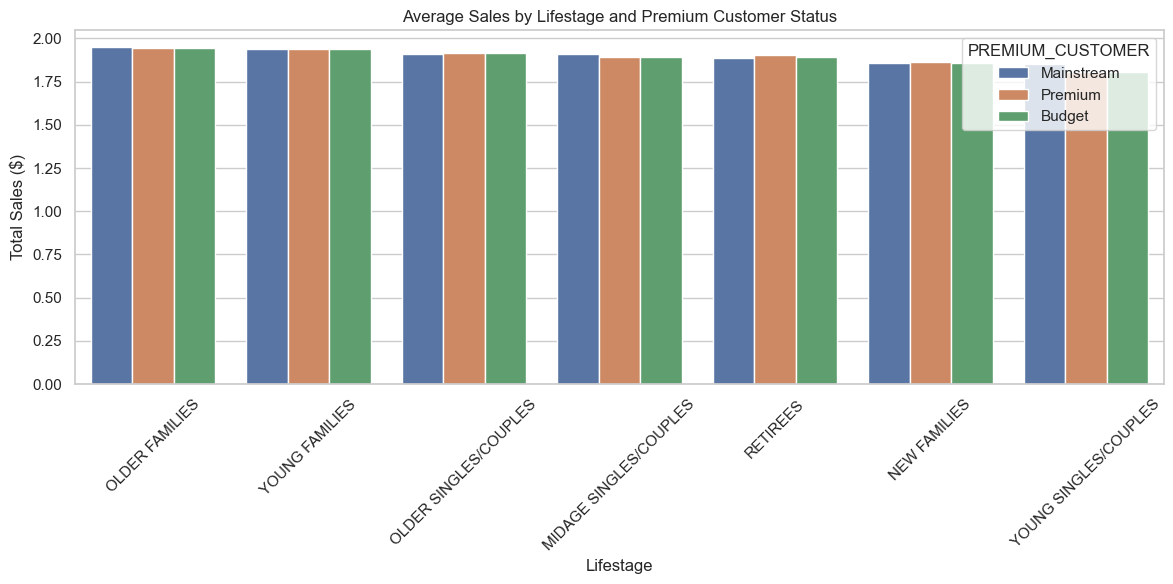

In [195]:
sales_by_segment_average = combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index().sort_values(by='PROD_QTY', ascending=False)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(
    data=sales_by_segment_average,
    x='LIFESTAGE',
    y='PROD_QTY',
    hue='PREMIUM_CUSTOMER'
)
plt.title('Average Sales by Lifestage and Premium Customer Status')
plt.ylabel('Total Sales ($)')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Older families and young families in general buy more chips per customer.

Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

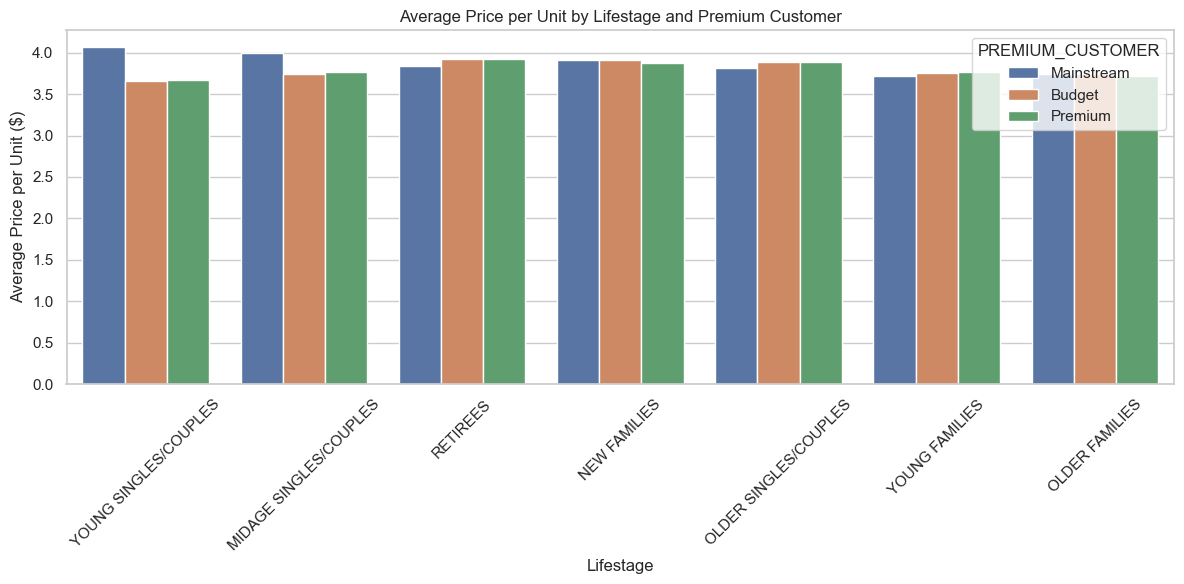

In [196]:
sales_by_segment_average_price_per_unit = combined_data.assign(UNIT_PRICE=combined_data['TOT_SALES'] / combined_data['PROD_QTY']).groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['UNIT_PRICE'].mean().reset_index(name='AVG_PRICE_PER_UNIT').sort_values(by='AVG_PRICE_PER_UNIT', ascending=False)
sales_by_segment_average_price_per_unit
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_by_segment_average_price_per_unit,
    x='LIFESTAGE',
    y='AVG_PRICE_PER_UNIT',
    hue='PREMIUM_CUSTOMER'
)
plt.title('Average Price per Unit by Lifestage and Premium Customer')
plt.ylabel('Average Price per Unit ($)')
plt.xlabel('Lifestage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. 

This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.

This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [197]:
filtered_data = combined_data[combined_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])].copy()
filtered_data['UNIT_PRICE'] = filtered_data['TOT_SALES'] / filtered_data['PROD_QTY']
mainstream_group = filtered_data[filtered_data['PREMIUM_CUSTOMER'] == 'Mainstream']['UNIT_PRICE']
non_mainstream_group = filtered_data[filtered_data['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])]['UNIT_PRICE']
t_stat, p_value = ttest_ind(mainstream_group, non_mainstream_group, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.6f}")
print(f"P-value: {p_value:.6f}")

T-statistic: 37.624389
P-value: 0.000000


The t-test results in a p-value of < 0.0001, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

## Deep dive into specific customer segments for insights

We might want to target customer segments that contribute the most to sales to retain them or further increase sales. 

Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

However, we still need to get the brand from the PROD_NAME first. And since the brand names are extracted manually, we have to make a manual approach to get the brand of each prod_name

In [198]:
#We get a function to get the brand from PROD_NAME
def get_brand(name: str) -> str:
    for brand in brands:
        if brand in name: return brand
    if 'Dorito' in name: return 'Doritos'
    if name == 'GrnWves Plus Btroot & Chilli Jam 180g': return 'Grain Waves'
    if name == 'Infzns Crn Crnchers Tangy Gcamole 110g': return 'Infuzions'
    if name == 'NCC Sour Cream &    Garden Chives 175g' or ('Natural' in name): return 'Natural Chip Co.'
    if 'RRD' in name: return 'Red Rock Deli'
    if 'Smith' in name: return 'Smiths'
    if name == 'Snbts Whlgrn Crisps Cheddr&Mstrd 90g' or name == 'Sunbites Whlegrn    Crisps Frch/Onin 90g': return 'Sunbites'
    if 'WW' in name: return 'Woolworths'
    return 'No brand found'

Let's create a column BRAND to store the brand, and create a new table that filter out the Mainstream - young singles/couples

In [199]:
combined_data['PROD_BRAND'] = combined_data['PROD_NAME'].apply(get_brand)
young_mainstream = combined_data[(combined_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (combined_data['PREMIUM_CUSTOMER'] == 'Mainstream')].copy()
young_mainstream

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND
16545,2018-08-16,1,1020,YOUNG SINGLES/COUPLES,Mainstream,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,Smiths
16546,2018-08-17,1,1163,YOUNG SINGLES/COUPLES,Mainstream,188,46,Kettle Original 175g,1,5.4,Kettle
16547,2018-08-14,1,1291,YOUNG SINGLES/COUPLES,Mainstream,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,Woolworths
16548,2019-05-15,3,3031,YOUNG SINGLES/COUPLES,Mainstream,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,Smiths
16549,2019-05-18,3,3118,YOUNG SINGLES/COUPLES,Mainstream,1574,62,Pringles Mystery Flavour 134g,1,3.7,Pringles
...,...,...,...,...,...,...,...,...,...,...,...
36084,2018-12-01,272,272377,YOUNG SINGLES/COUPLES,Mainstream,270186,75,Cobs Popd Sea Salt Chips 110g,2,7.6,Cobs
36085,2018-07-27,272,272389,YOUNG SINGLES/COUPLES,Mainstream,270200,114,Kettle Sensations Siracha Lime 150g,2,9.2,Kettle
36086,2018-11-10,272,272389,YOUNG SINGLES/COUPLES,Mainstream,270201,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,Pringles
36087,2019-04-01,272,272389,YOUNG SINGLES/COUPLES,Mainstream,270202,62,Pringles Mystery Flavour 134g,2,7.4,Pringles


Before we start, let's make sure out function works correctly

If none of the brand matching works, it will return 'No brand found'

So we should check if there is any 'No brand found' in the BRAND column

In [202]:
unmatch = combined_data[combined_data['PROD_BRAND'] == 'No brand found']
unmatch

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,PROD_WEIGHT


Empty table, which means the function works great.

Now we will use affinity analysis for the targeted group of customer

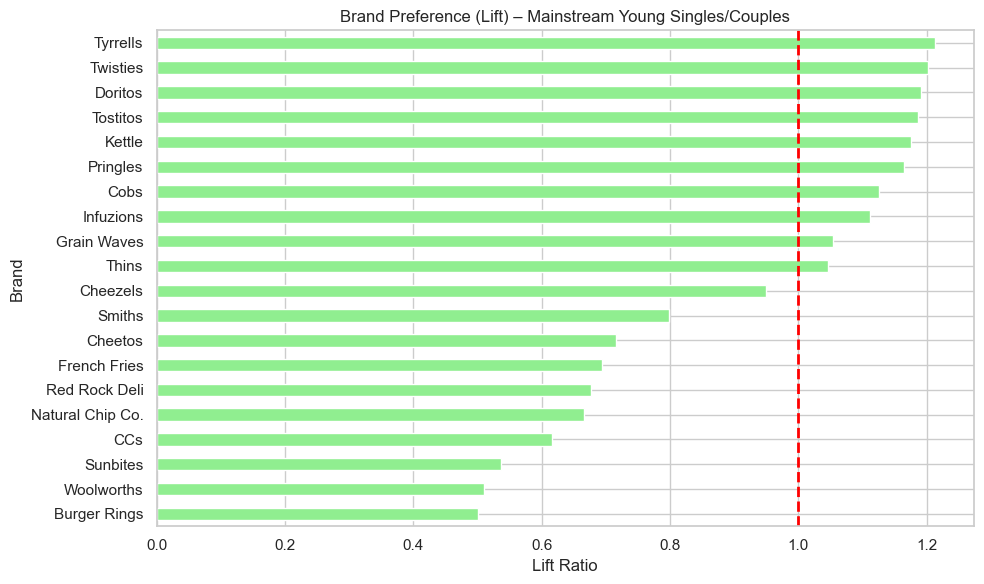

In [ ]:
brand_counts_target = young_mainstream['BRAND'].value_counts(normalize=True)
brand_counts_all = combined_data['BRAND'].value_counts(normalize=True)
brand_lift = (brand_counts_target / brand_counts_all).dropna().sort_values(ascending=False)
brand_lift.plot(kind='barh', figsize=(10, 6), color = 'lightgreen')
plt.axvline(x=1, color='red', linestyle='--', linewidth=2)
plt.title('Brand Preference (Lift) – Mainstream Young Singles/Couples')
plt.xlabel('Lift Ratio')
plt.ylabel('Brand')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Mainstream young singles and couples over-index on several brands compared to the overall customer base. Brands such as:

- Tyrrells,

- Twisties,

- Doritos,

- Tostitos,

- Kettle, and

- Pringles

show lift ratios greater than 1, indicating that these segments are more likely to purchase these brands than the average customer.

On the other hand, brands like:

- Woolworths,

- Burger Rings,

- Sunbites, and

- CCs

have lift ratios well below 1, suggesting they are less popular among mainstream young singles/couples relative to the rest of the market.

This segment prefers more premium or well-known snack brands and is less likely to choose budget/private-label brands. 

This aligns with their “mainstream” status — likely valuing brand recognition and perceived quality, but not as price-sensitive as budget shoppers.

Next, we will check if our target segment tends to buy larger packs of chips. Firstly, we need to add a column to get the weight of the product

In [204]:
#We already know this function works in the above section
def get_weight(prod:str) -> int:
    match = re.search(r'(\d+)\s?g', prod, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return -1
combined_data['PROD_WEIGHT'] = combined_data['PROD_NAME'].apply(get_weight)
combined_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_BRAND,PROD_WEIGHT
0,2018-09-18,69,69077,YOUNG FAMILIES,Premium,66316,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,Smiths,170
1,2018-11-02,69,69077,YOUNG FAMILIES,Premium,66317,44,Thins Chips Light& Tangy 175g,2,6.6,Thins,175
2,2018-12-17,69,69077,YOUNG FAMILIES,Premium,66318,67,RRD Chilli& Coconut 150g,2,5.4,Red Rock Deli,150
3,2018-12-22,69,69077,YOUNG FAMILIES,Premium,66319,43,Smith Crinkle Cut Bolognese 150g,2,5.2,Smiths,150
4,2019-02-01,69,69077,YOUNG FAMILIES,Premium,66321,74,Tostitos Splash Of Lime 175g,2,8.8,Tostitos,175
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-01-16,69,69069,YOUNG FAMILIES,Premium,66267,36,Kettle Chilli 175g,2,10.8,Kettle,175
246736,2019-04-24,69,69069,YOUNG FAMILIES,Premium,66268,103,RRD Steak & Chimuchurri 150g,2,5.4,Red Rock Deli,150
246737,2019-06-05,69,69069,YOUNG FAMILIES,Premium,66269,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4,Sunbites,90
246738,2018-07-09,69,69077,YOUNG FAMILIES,Premium,66314,54,CCs Original 175g,2,4.2,CCs,175


Now we will analyze the weight of chips bought by the targeted group of customers

Average pack size (g) for Mainstream - Young Singles/Couples: 178.34g


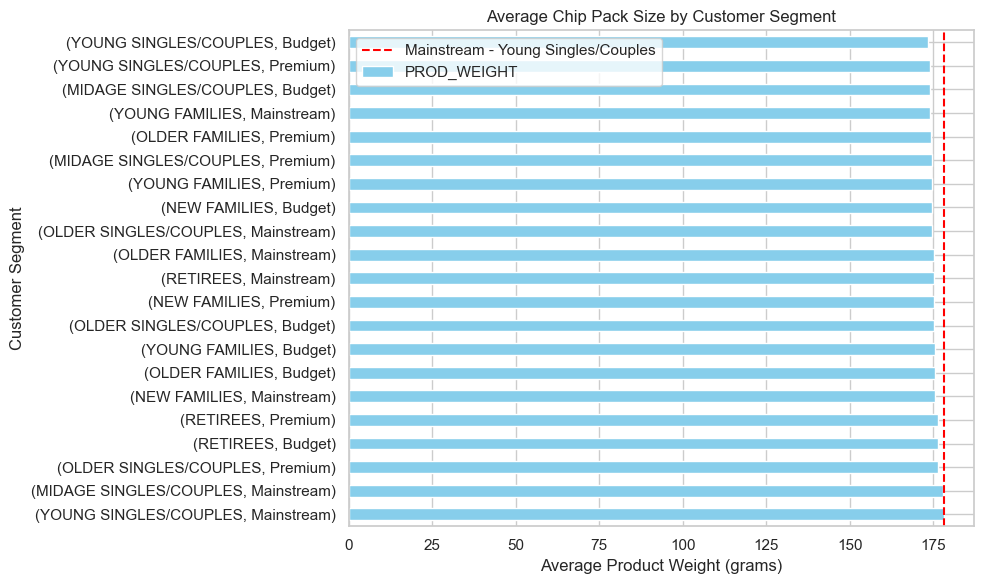

In [209]:
young_mainstream = combined_data[(combined_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (combined_data['PREMIUM_CUSTOMER'] == 'Mainstream')].copy()
target_avg_weight = young_mainstream['PROD_WEIGHT'].mean()
print(f"Average pack size (g) for Mainstream - Young Singles/Couples: {target_avg_weight:.2f}g")
avg_weight_by_segment = combined_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_WEIGHT'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_weight_by_segment.plot(kind='barh', color='skyblue')
plt.axvline(target_avg_weight, color='red', linestyle='--', label='Mainstream - Young Singles/Couples')
plt.title("Average Chip Pack Size by Customer Segment")
plt.xlabel("Average Product Weight (grams)")
plt.ylabel("Customer Segment")
plt.legend()
plt.tight_layout()
plt.show()

The Mainstream – Young Singles/Couples segment has the highest average product weight across all customer segments.

- This suggests that this group prefers larger chip pack sizes more than any other segment.

- It's quite a surprising insight, especially given the assumption that smaller households (like singles or couples) might prefer smaller packs.

Possible interpretations:

- They may be heavy snackers or buying in bulk to reduce shopping frequency.

- May prefer better value per gram, which typically comes with larger packs.

- Could also reflect social consumption habits (e.g., sharing with friends or at gatherings).

This is the end of the analysis. For future reusability, let's save the table into a csv file

In [210]:
combined_data.to_csv('QVI_data.csv')